<a href="https://colab.research.google.com/github/ramonfercruz/dados_enem/blob/main/EstudoDadosEnem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import os
import zipfile
from google.colab import drive
import pandas as pd
import plotly


In [2]:
#pd.options.plotting.backend = 'plotly'

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
diretorio = '/content/drive/MyDrive/Dados Enem/'

In [5]:
link = 'http://download.inep.gov.br/microdados/microdados_enem_2019.zip'

nome_arquivo = link.split('/')[-1:][0]
arquivo = os.path.join(diretorio, nome_arquivo)

In [6]:
if not os.path.exists(arquivo):
  response = requests.get(link, allow_redirects=True, verify=False, timeout=1000)
  if response.status_code == 200:
    with open(arquivo, 'wb') as file:
      file.write(response.content)
    print('Arquivo salvo')
  else:
    print(response.status_code)
else:
  print('Arquivo ja existe')

  

Arquivo ja existe


In [7]:
with zipfile.ZipFile(arquivo) as filezip:
  lista = filezip.namelist()

In [8]:
lista

['LEIA-ME E DOCUMENTOS TÉCNICOS/',
 'LEIA-ME E DOCUMENTOS TÉCNICOS/matriz_referencia_enem.pdf',
 'LEIA-ME E DOCUMENTOS TÉCNICOS/Leia_Me_Enem_2019.pdf',
 'LEIA-ME E DOCUMENTOS TÉCNICOS/manual_de_redacao_do_enem_2019.pdf',
 'LEIA-ME E DOCUMENTOS TÉCNICOS/Edital_enem_2019.pdf',
 'PROVAS E GABARITOS/',
 'PROVAS E GABARITOS/ENEM_2019_P1_CAD_02_DIA_1_AMARELO.pdf',
 'PROVAS E GABARITOS/ENEM_2019_P1_CAD_02_DIA_1_AMARELO_AMPLIADA.pdf',
 'PROVAS E GABARITOS/ENEM_2019_P1_CAD_02_DIA_1_AMARELO_SUPERAMPLIADA.pdf',
 'PROVAS E GABARITOS/ENEM_2019_P1_CAD_03_DIA_1_BRANCO.pdf',
 'PROVAS E GABARITOS/ENEM_2019_P1_CAD_04_DIA_1_ROSA.pdf',
 'PROVAS E GABARITOS/ENEM_2019_P1_CAD_09_DIA_1_LARANJA_LEDOR.pdf',
 'PROVAS E GABARITOS/ENEM_2019_P1_CAD_10_DIA_1_VERDE_LIBRAS.pdf',
 'PROVAS E GABARITOS/ENEM_2019_P1_CAD_05_DIA_2_AMARELO.pdf',
 'PROVAS E GABARITOS/ENEM_2019_P1_GAB_02_DIA_1_AMARELO.pdf.pdf',
 'PROVAS E GABARITOS/ENEM_2019_P1_GAB_02_DIA_1_AMARELO_AMPLIADA.pdf',
 'PROVAS E GABARITOS/ENEM_2019_P1_GAB_02_DIA_1_

In [9]:

with zipfile.ZipFile(arquivo) as file_zip:
  with file_zip.open('DADOS/MICRODADOS_ENEM_2019.csv','r') as file_csv:
    df_enem = pd.read_csv(file_csv, sep=';',nrows=0, encoding='latin1')


In [10]:
df_enem.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

In [11]:
colunas = ['NU_INSCRICAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC','NU_NOTA_MT','NU_IDADE', 'TP_SEXO', 'SG_UF_NASCIMENTO','Q006', 'Q025', 'TP_COR_RACA']

In [12]:
with zipfile.ZipFile(arquivo) as file_zip:
  with file_zip.open('DADOS/MICRODADOS_ENEM_2019.csv','r') as file_csv:
    df_enem = pd.read_csv(file_csv, sep=';', encoding='latin1',usecols=colunas)

In [13]:
df_enem.NU_NOTA_MT.describe()

count    3.710433e+06
mean     5.231241e+02
std      1.090637e+02
min      0.000000e+00
25%      4.351000e+02
50%      5.011000e+02
75%      5.978000e+02
max      9.855000e+02
Name: NU_NOTA_MT, dtype: float64

In [14]:
dados_matematica = dict(df_enem.NU_NOTA_MT.describe())
dados_matematica

{'25%': 435.1,
 '50%': 501.1,
 '75%': 597.8,
 'count': 3710433.0,
 'max': 985.5,
 'mean': 523.1241219824913,
 'min': 0.0,
 'std': 109.06368552884149}

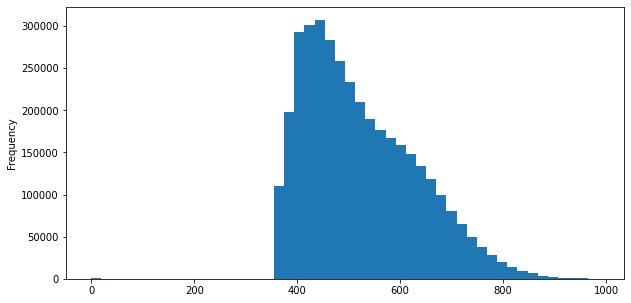

In [16]:
df_enem.NU_NOTA_MT.plot(kind='hist',figsize=(10, 5), bins=50)

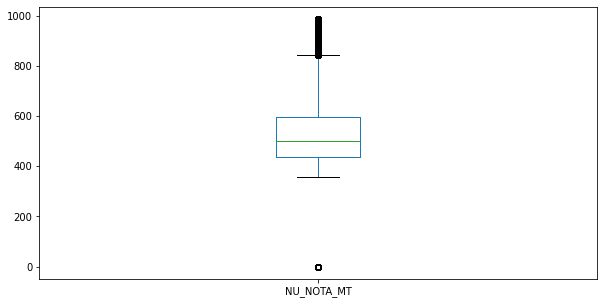

In [17]:
df_enem.NU_NOTA_MT.plot(kind='box', figsize=(10, 5))

In [18]:
dados_idade= dict(df_enem.NU_IDADE.describe())
dados_idade

{'25%': 18.0,
 '50%': 19.0,
 '75%': 24.0,
 'count': 5095270.0,
 'max': 94.0,
 'mean': 22.08743069552742,
 'min': 1.0,
 'std': 7.454970482143298}

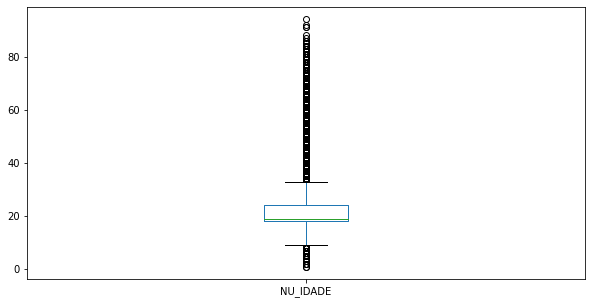

In [19]:
df_enem.NU_IDADE.plot(kind='box', figsize=(10, 5))

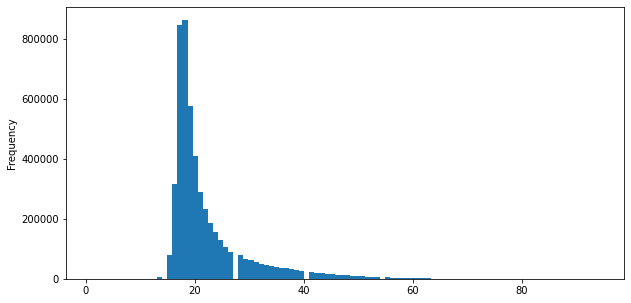

In [20]:
df_enem.NU_IDADE.plot(kind='hist',figsize=(10, 5), bins=100)

In [21]:
RENDA = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q']

In [22]:
dict_renda = {}
for i, item in enumerate(RENDA):
  dict_renda[item] = i + 1


In [23]:
df_enem.Q006 = df_enem.Q006.map(dict_renda)

In [24]:
df_enem.rename(columns={'NU_NOTA_MT': 'Nota Matematica', 'Q006': 'Renda', 'Q025': 'Internet'}, inplace=True)

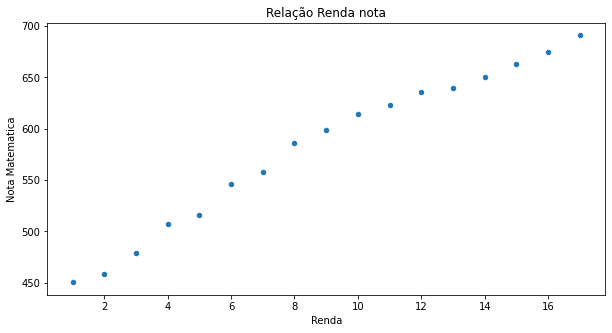

In [25]:
df_enem[['Nota Matematica', 'Renda']].groupby('Renda', as_index=False).median().plot(kind='scatter', x='Renda', y='Nota Matematica', title='Relação Renda nota', figsize=(10,5))

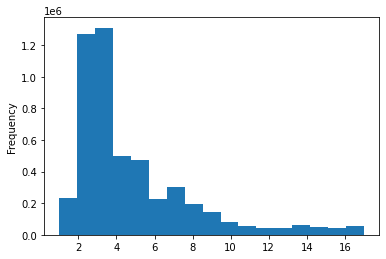

In [26]:
df_enem.Renda.plot.hist(bins=17)

In [27]:
df_enem.Renda.value_counts()

3     1311465
2     1273250
4      499616
5      475568
7      301922
1      232075
6      226251
8      192912
9      143652
10      80789
14      61649
11      58026
17      57149
15      50203
12      44189
13      43300
16      43254
Name: Renda, dtype: int64

In [28]:
dict_internet = {'A': 'Não',
                 'B': 'Sim'}

In [29]:
df_enem.Internet = df_enem.Internet.map(dict_internet)

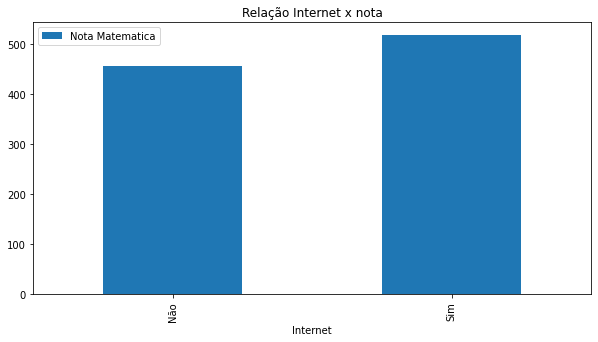

In [30]:
df_enem[['Nota Matematica', 'Internet']].groupby('Internet', as_index=False).median().plot(kind='bar', x='Internet', y='Nota Matematica', title='Relação Internet x nota', figsize=(10,5))

In [31]:
TP_COR_RACA = {0 : 'Não declarado', 1 : 'Branca', 2 : 'Preta', 3 : 'Parda', 4 : 'Amarela', 5 : 'Indígena '}

In [32]:
df_enem.TP_COR_RACA = df_enem.TP_COR_RACA.map(TP_COR_RACA)

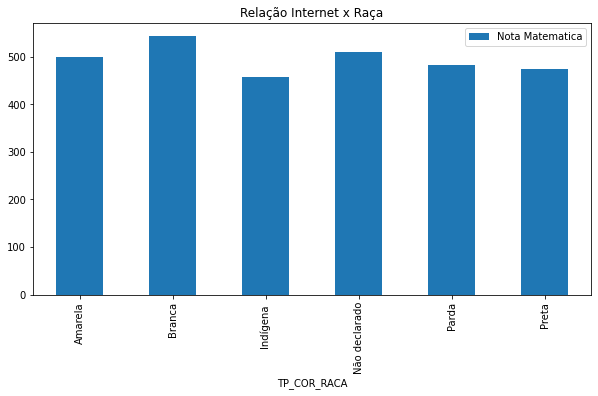

In [33]:
df_enem[['Nota Matematica', 'TP_COR_RACA']].groupby('TP_COR_RACA', as_index=False).median().plot(kind='bar', x='TP_COR_RACA', y='Nota Matematica', title='Relação Internet x Raça', figsize=(10,5))

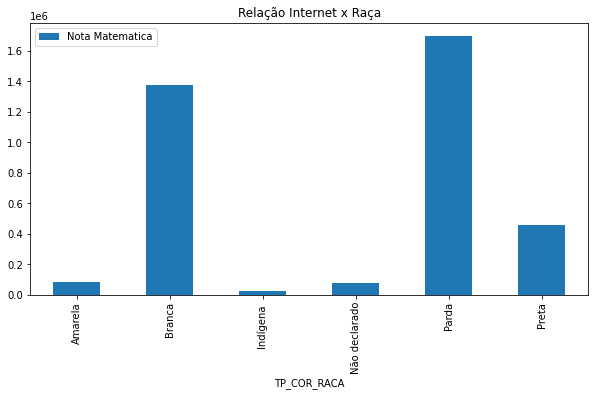

In [34]:
df_enem[['Nota Matematica', 'TP_COR_RACA']].groupby('TP_COR_RACA', as_index=False).count().plot(kind='bar', x='TP_COR_RACA', y='Nota Matematica', title='Relação Internet x Raça', figsize=(10,5))